0 [1, 3, 4]
1 [0, 2]
2 [1]
3 [0]
4 [0]


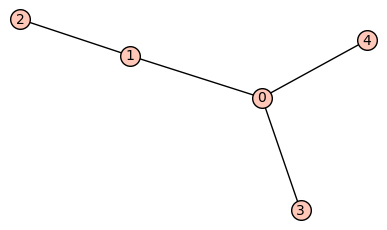

In [3]:
drevesa5 = [dr for dr in graphs.trees(5)] #na tak nacin dobis seznam objektov dreves s petimi vozlisci (ni duplikatov)
stevilo_dreves5 = len(drevesa5) #stevilo dreves s petimi vozlisci
G = drevesa5[1] #vzamem taprvo drevo iz seznama in pogledam seznam sosedov za vsako vozlisce
for voz in G:
    print voz, G[voz]

show(G) #narisem drevo

In [4]:
def ABCindeks(drevo): #izracun ABC indeksa za neko drevo, len(drevo[u]) ti da dolzino seznama sosedov za vozlisce u torej je to stopnja vozlisca u
    produkt = 1
    for u in drevo:
        for v in drevo[u]:
            produkt = produkt * (len(drevo[u]) + len(drevo[v]) - 2) / (len(drevo[u]) * len(drevo[v]))
    return sqrt(produkt)

ABCindeks(G)

1/9

In [7]:
def minABCindeks(n): #izracun najmanjsega ABC indeksa za vsa drevesa z n vozlisci, vrne tudi seznam dreves, ki imajo ta najmanjsi indeks
    drevesa = [dr for dr in graphs.trees(n)]
    indeksi = []
    for dr in drevesa:
        indeksi.append(ABCindeks(dr))
    minimum = min(indeksi)
    pozicije = [i for i, v in enumerate(indeksi) if v == minimum] # to je da dobimo pozicije na katerih so min indeksi, da vemo katera drevesa imajo te indekse
    drevesa_z_min_ind = [drevesa[i] for i in pozicije]
    return minimum , drevesa_z_min_ind

[vrednost, graf] = minABCindeks(5)
#show(graf) #pri drevesih s petimi vozlisci je samo en graf z min ABC indeksom, tu ga narisemo

In [8]:
rezultati = []
for n in range(15) : #range naredi seznam od 0 do 9, midva hoceva grafe z vozlisci od 1 do 10 zato je spodaj n+1
        rez = [vrednost, seznam_grafov] = minABCindeks(n+1)
        rezultati.append(rez)
rezultati #rabu je 7.5 sekund da je to vn vrgu tkoda mormo za vecje grafe probat

[(1, [Graph on 1 vertex]),
 (0, [Graph on 2 vertices]),
 (1/4, [Graph on 3 vertices]),
 (1/8, [Graph on 4 vertices]),
 (1/16, [Graph on 5 vertices]),
 (1/32, [Graph on 6 vertices]),
 (1/64, [Graph on 7 vertices, Graph on 7 vertices]),
 (1/128, [Graph on 8 vertices, Graph on 8 vertices]),
 (1/256,
  [Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices]),
 (1/576, [Graph on 10 vertices]),
 (1/1152, [Graph on 11 vertices]),
 (5/12288, [Graph on 12 vertices]),
 (1/5184, [Graph on 13 vertices]),
 (3/32768, [Graph on 14 vertices]),
 (25/589824, [Graph on 15 vertices])]

In [10]:
# recimo da naju zanimajo premeri teh grafov, uporabiva lahko metodo diameter za objekte graphs
premeri = []
for (vrednost, seznam_grafov) in rezultati:
    pr = []
    for graf in seznam_grafov:
        pr.append(graf.diameter())
    premeri.append(pr)
premeri

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 4],
 [7, 5],
 [8, 6, 6, 4],
 [5],
 [6],
 [5],
 [6],
 [5],
 [6]]

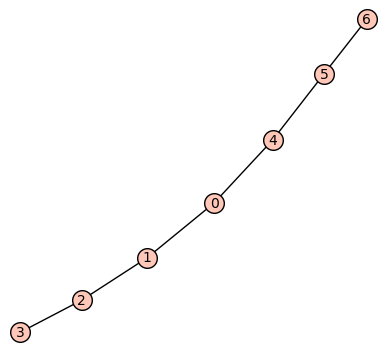

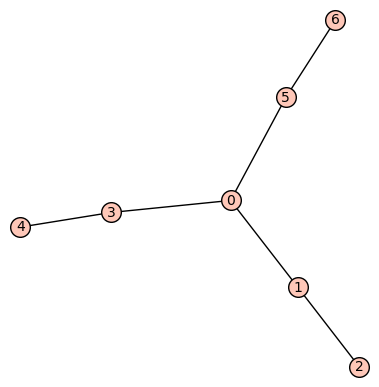

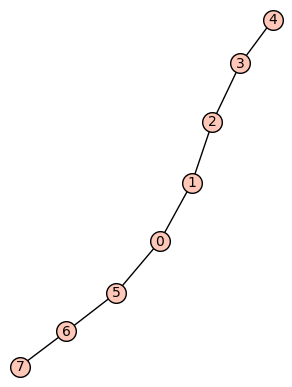

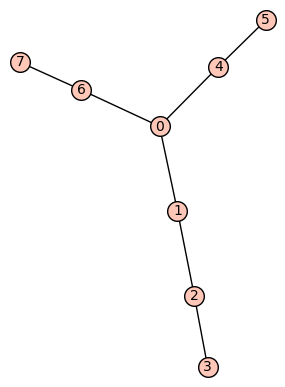

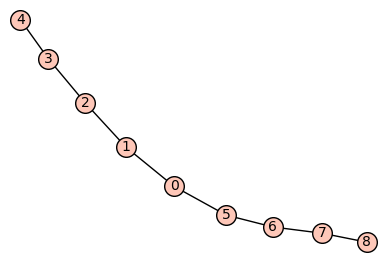

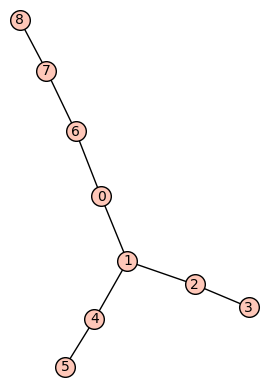

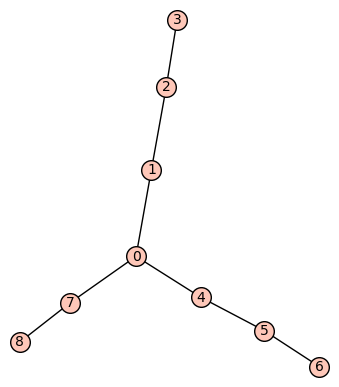

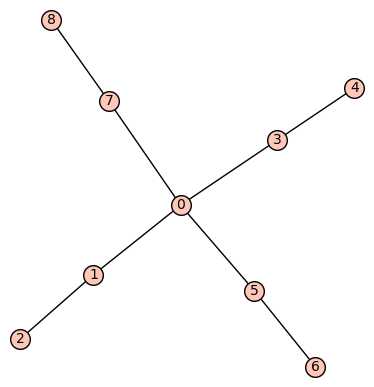

In [11]:
#ce naju zanima unikatnost dreves, lahko v seznamu dreves v rezultatih vidiva ali je samo eno drevo z min indeksom ali jih je vec, ce jih je vec si jih je morda smiselno narisati
for (vrednost, seznam_grafov) in rezultati:
    if len(seznam_grafov) >= 2:
        for graf in seznam_grafov:
            show(graf)